In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/preprocessed.csv')

In [67]:
print(df.columns.tolist())

['Unnamed: 0', 'id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [68]:
df[[ 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']]

,ba,bgr,bu,sc,sod,pot,hemo
0,notpresent,121.00000,36.0,1.2,133.88253,4.88303,15.4
1,notpresent,175.52381,18.0,0.8,133.88253,4.88303,11.3
2,notpresent,423.00000,53.0,1.8,133.88253,4.88303,9.6
3,notpresent,117.00000,56.0,3.8,111.00000,2.50000,11.2
4,notpresent,106.00000,26.0,1.4,133.88253,4.88303,11.6
...,...,...,...,...,...,...,...
393,notpresent,140.00000,49.0,0.5,150.00000,4.90000,15.7
394,notpresent,75.00000,31.0,1.2,141.00000,3.50000,16.5
395,notpresent,100.00000,26.0,0.6,137.00000,4.40000,15.8
396,notpresent,114.00000,50.0,1.0,135.00000,4.90000,14.2


In [69]:
df.head()

,Unnamed: 0,id,age,bp,sg,al,su,rbc,pc,pcc,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,...,38.0,6000.0,1.994355,no,no,no,good,no,no,ckd
2,2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,...,31.0,7500.0,1.994355,no,yes,no,poor,no,yes,ckd
3,3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [70]:

new_df = pd.DataFrame(df[['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']])


In [71]:
le = LabelEncoder()
for col in new_df.columns:
  new_df[col] = le.fit_transform(new_df[col])

In [72]:
new_df.tail()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
393,1,1,0,0,0,3,1,0,0,0,1
394,1,1,0,0,0,3,1,0,0,0,1
395,1,1,0,0,0,3,1,0,0,0,1
396,1,1,0,0,0,3,1,0,0,0,1
397,1,1,0,0,0,3,1,0,0,0,1


In [73]:
X = new_df.drop(columns= ['classification'], axis=1)
y = df['classification']

In [74]:
chi2_score = chi2(X, y)

In [75]:
print(chi2_score[0])

[ 6.67835264  0.64004096 15.89304898  5.50751034 82.60780411  6.05508944
  1.1527041  48.38709677 43.41820416 33.1516147 ]


<Axes: >

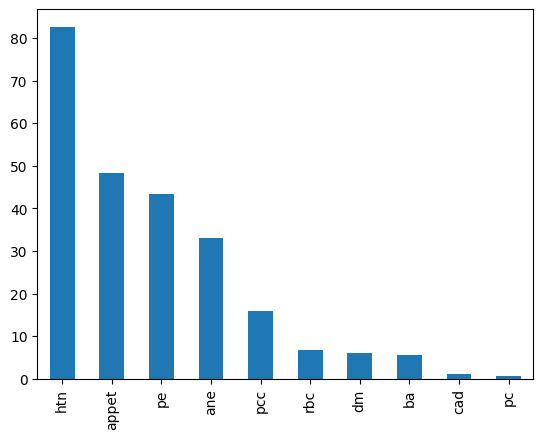

In [76]:
chi_values = pd.Series(chi2_score[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

In [77]:

df['classification'] = le.fit_transform(df['classification'])


In [78]:
corr = df[['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'classification']].corr()

In [79]:
df[['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'classification']].fillna(0)


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
0,0,48.0,80.0,1.020,1.0,0.0,121.00000,36.0,1.2,133.88253,4.88303,15.4,44.0,7800.0,5.200000,0
1,1,7.0,50.0,1.020,4.0,0.0,175.52381,18.0,0.8,133.88253,4.88303,11.3,38.0,6000.0,1.994355,0
2,2,62.0,80.0,1.010,2.0,3.0,423.00000,53.0,1.8,133.88253,4.88303,9.6,31.0,7500.0,1.994355,0
3,3,48.0,70.0,1.005,4.0,0.0,117.00000,56.0,3.8,111.00000,2.50000,11.2,32.0,6700.0,3.900000,0
4,4,51.0,80.0,1.010,2.0,0.0,106.00000,26.0,1.4,133.88253,4.88303,11.6,35.0,7300.0,4.600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,395,55.0,80.0,1.020,0.0,0.0,140.00000,49.0,0.5,150.00000,4.90000,15.7,47.0,6700.0,4.900000,1
394,396,42.0,70.0,1.025,0.0,0.0,75.00000,31.0,1.2,141.00000,3.50000,16.5,54.0,7800.0,6.200000,1
395,397,12.0,80.0,1.020,0.0,0.0,100.00000,26.0,0.6,137.00000,4.40000,15.8,49.0,6600.0,5.400000,1
396,398,17.0,60.0,1.025,0.0,0.0,114.00000,50.0,1.0,135.00000,4.90000,14.2,51.0,7200.0,5.900000,1


In [80]:
s = ['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'classification']
for i in s:
     if df[i].isnull().sum() != 0:
      print(i)
      e = df[i].isnull()
      ind = e[e].index
      print(ind)
      df.loc[ind, i] = df.loc[ind, i].fillna(0)



bgr
Int64Index([274, 281, 310, 313, 330, 376], dtype='int64')
bu
Int64Index([274, 281, 310, 313, 332, 376], dtype='int64')
sc
Int64Index([274, 281, 310, 313, 332], dtype='int64')
sod
Int64Index([281, 301, 313, 334, 361], dtype='int64')
pot
Int64Index([281, 301, 313, 334, 361], dtype='int64')
hemo
Int64Index([271, 317, 322, 326, 328, 363], dtype='int64')


<Axes: >

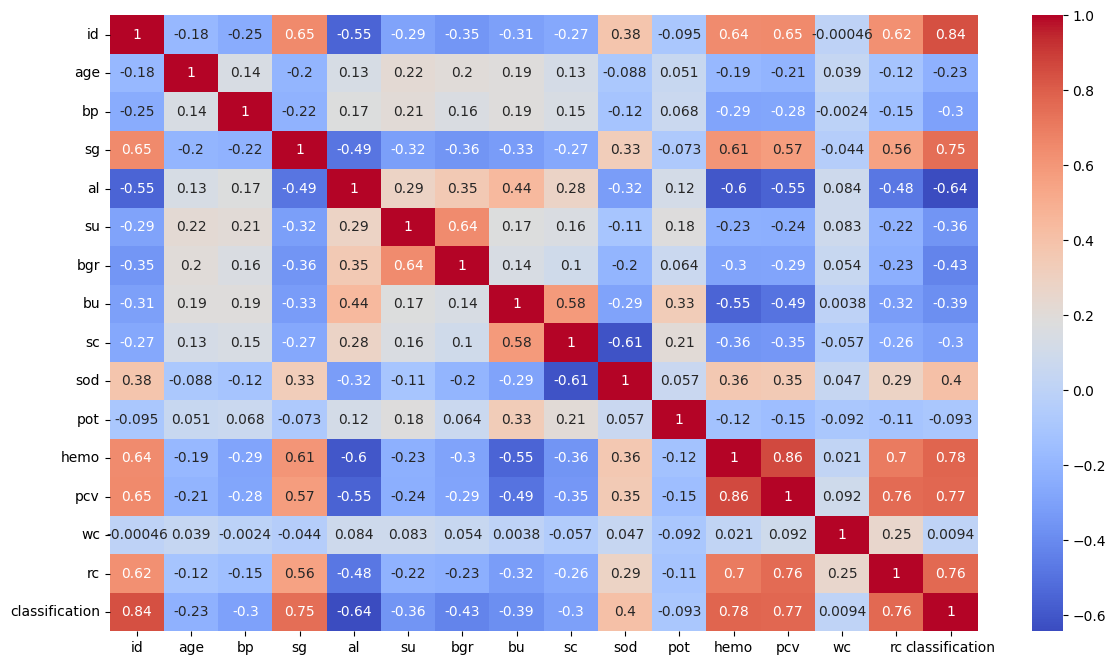

In [81]:
plt.figure(figsize=(14,8))

sns.heatmap(corr, annot=True, cmap='coolwarm')

In [82]:
corr

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
id,1.000000,-0.183817,-0.247433,0.649069,-0.550566,-0.292832,-0.349137,-0.308834,-0.269632,0.378449,-0.094984,0.643083,0.650508,-0.000458,0.622519,0.839725
age,-0.183817,1.000000,0.140971,-0.203586,0.134203,0.221737,0.198097,0.187852,0.126327,-0.087958,0.050871,-0.185616,-0.210043,0.038582,-0.115641,-0.225985
bp,-0.247433,0.140971,1.000000,-0.217125,0.172017,0.210112,0.156431,0.186420,0.145798,-0.116211,0.068064,-0.287657,-0.280707,-0.002429,-0.147781,-0.300320
sg,0.649069,-0.203586,-0.217125,1.000000,-0.487726,-0.315424,-0.357450,-0.327525,-0.270277,0.330869,-0.072610,0.606089,0.570839,-0.043609,0.555026,0.746944
al,-0.550566,0.134203,0.172017,-0.487726,1.000000,0.285068,0.352042,0.442821,0.278778,-0.320232,0.119055,-0.602213,-0.553617,0.083857,-0.478927,-0.643473
su,-0.292832,0.221737,0.210112,-0.315424,0.285068,1.000000,0.642645,0.172095,0.156270,-0.108808,0.183716,-0.231442,-0.236039,0.082933,-0.215648,-0.360280
bgr,-0.349137,0.198097,0.156431,-0.357450,0.352042,0.642645,1.000000,0.141880,0.099879,-0.204968,0.063914,-0.296011,-0.289955,0.054004,-0.232767,-0.430913
bu,-0.308834,0.187852,0.186420,-0.327525,0.442821,0.172095,0.141880,1.000000,0.583391,-0.293376,0.334469,-0.547531,-0.494742,0.003776,-0.317082,-0.386189
sc,-0.269632,0.126327,0.145798,-0.270277,0.278778,0.156270,0.099879,0.583391,1.000000,-0.613904,0.207209,-0.358584,-0.346367,-0.057007,-0.258836,-0.303399
sod,0.378449,-0.087958,-0.116211,0.330869,-0.320232,-0.108808,-0.204968,-0.293376,-0.613904,1.000000,0.057360,0.362038,0.347013,0.047126,0.285846,0.403594


In [83]:
df.dtypes

Unnamed: 0          int64
id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification      int64
dtype: object

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Load your dataset into a DataFrame
# df = pd.read_csv('your_dataset.csv')



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name}: Accuracy = {accuracy:.2f}')
    # Calculate confusion matrix and accuracy
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print('Confusion Matrix:')
    print(cm)
    print('\nMetrics:')
    print('Accuracy:', accuracy*100, '%')
    print('Precision:', precision*100, '%')
    print('Recall:', recall*100, '%')
    print('F1-Score:', f1*100, '%')
    print('-------------------\n')












Logistic Regression: Accuracy = 1.00
Confusion Matrix:
[[52  0]
 [ 0 28]]

Metrics:
Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1-Score: 100.0 %
-------------------

SVM: Accuracy = 1.00
Confusion Matrix:
[[52  0]
 [ 0 28]]

Metrics:
Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1-Score: 100.0 %
-------------------

KNN: Accuracy = 0.99
Confusion Matrix:
[[51  1]
 [ 0 28]]

Metrics:
Accuracy: 98.75 %
Precision: 96.55172413793103 %
Recall: 100.0 %
F1-Score: 98.24561403508771 %
-------------------

Decision Tree: Accuracy = 1.00
Confusion Matrix:
[[52  0]
 [ 0 28]]

Metrics:
Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1-Score: 100.0 %
-------------------

Random Forest: Accuracy = 1.00
Confusion Matrix:
[[52  0]
 [ 0 28]]

Metrics:
Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1-Score: 100.0 %
-------------------



In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load your dataset into a DataFrame
# df = pd.read_csv('your_dataset.csv')
X = df[['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']]

y = df['classification']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name}: Accuracy = {accuracy:.2f}')
    # Calculate confusion matrix and accuracy
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    print('Confusion Matrix:')
    print(cm)
    print('\nMetrics:')
    print('Accuracy:', accuracy*100, '%')
    print('Precision:', precision*100, '%')
    print('Recall:', recall*100, '%')
    print('F1-Score:', f1*100, '%')
    print('-------------------\n')













Logistic Regression: Accuracy = 1.00
Confusion Matrix:
[[52  0]
 [ 0 28]]

Metrics:
Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1-Score: 100.0 %
-------------------

SVM: Accuracy = 1.00
Confusion Matrix:
[[52  0]
 [ 0 28]]

Metrics:
Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1-Score: 100.0 %
-------------------

KNN: Accuracy = 0.99
Confusion Matrix:
[[51  1]
 [ 0 28]]

Metrics:
Accuracy: 98.75 %
Precision: 96.55172413793103 %
Recall: 100.0 %
F1-Score: 98.24561403508771 %
-------------------

Decision Tree: Accuracy = 1.00
Confusion Matrix:
[[52  0]
 [ 0 28]]

Metrics:
Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1-Score: 100.0 %
-------------------

Random Forest: Accuracy = 1.00
Confusion Matrix:
[[52  0]
 [ 0 28]]

Metrics:
Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1-Score: 100.0 %
-------------------

